# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Putri Ayu Umi Muhsinin
- **Email:** putri.ayyumi79@gmail.com
- **ID Dicoding:** putriayu79

## Menentukan Pertanyaan Bisnis

- Apakah ada peningkatan atau penurunan penjualan yang signifikan dari bulan ke bulan? lalu bagaimana dampaknya bagi pendapatan?
- Kategori produk apa yang paling banyak diminati dan paling sepi peminat?
- Kota mana yang memiliki jumlah pembeli terbanyak?
- Kota mana yang memiliki jumlah penjual terbanyak?

## Import Semua Packages/Library yang Digunakan

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Wrangling

### Gathering Data

##### Memuat tabel customers_df

In [7]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/payy79/Dicoding/refs/heads/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##### Memuat tabel orders_df

In [8]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/payy79/Dicoding/refs/heads/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/payy79/Dicoding/refs/heads/main/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


##### Memuat tabel product_df

In [10]:
product_df = pd.read_csv("https://raw.githubusercontent.com/payy79/Dicoding/refs/heads/main/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


##### Memuat tabel sellers_df

In [11]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/payy79/Dicoding/refs/heads/main/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**


*   Dari tabel customers_df kita dapat mengetahui asal kota pembali yang dapat digunakan untuk menganalisi kota dengan jumlah pembeli terbanyak
*   Dari tabel orders_df kita dapat mengetahui kapan proses pemesanan terjadi. Hal ini dapat menjadi acuan untuk menganalisis penjualan bulanan
* Dari tabel product_df kita dapat mengetahui beragam kategori produk yang tersedia. Ini bisa menjadi bekal untuk menganalisi kategori produk yang paling banyak peminat dan paling sepi peminat
* Dari tabel sellers_df kita dapat mengetahui asal kota penjual yang bisa digunakan untuk menganalisis kota dengan penjual terbanyak



### Assessing Data

##### Menilai data customers_df


In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menilai Data Orders_df



In [14]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [16]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### Menilai Data Product_df


In [19]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [20]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [21]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Menilai Data Sellers_df


In [22]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [23]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()


Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


##### **Insight:**
- Tidak ada masalah dengan data customers_df. Tidak ada nilai yang hilang, tidak ada duplikasi data, dan type data sudah sesuai
* Pada data orders_df terdapat beberapa data yang hilang dan type data tidak sesuai, namun tidak ada duplikasi
*   Pada data product_df terdapat beberapa data yang hilang, namun tipe data sudah sesuai dan tidak ada duplikasi
*   Tidak ada masalah dengan data sellers_df. Tidak ada nilai yang hilang, tidak ada duplikasi data, dan type data sudah sesuai



### Cleaning Data

#### Membersihkan Data orders_df


In [24]:
# Mengubah type data object menjadi datetime pada kolom yang menunjukkan waktu
datetime_columns = ["order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", "order_purchase_timestamp", "order_approved_at"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [25]:
# Mencari informasi untuk mengetahui kesesuaian data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [26]:
# Mengetahui missing value pada kolom order_approved_at
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Missing value pada order_approved_at kemungkinan besar dikarenakan status_order berupa canceled, sehingga tidak terjadi transaksi jual beli. Dengan asumsi ini kita dapat mengatasinya dengan menghapus baris dengan order_approved_at yang bernilai Nat (missing value).

In [27]:
# Menghilangkan missing value pada kolom order_approved_at dengan pertimbangan pesanan yang di cancel
# sehingga tidak terjadi transaksi jual beli
orders_df.dropna(subset=['order_approved_at'], inplace=True)

In [28]:
# Mengetahui missing value pada kolom order_delivered_carrier_date
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Dari tabel di atas diketahui missing value pada kolom order_delivered_carrier_date kemungkinan terjadi karena status_order masih dalam tahapan proses. Dengan asumsi ini kita depat mengganti nilai yang hilang dengan data order_approved_at dengan tambahan rata-rata waktu tunggu dari order_approved_at	 hingga order_delivered_carrier_date.

In [29]:
# Menghitung lead time
lead_time = orders_df["order_delivered_carrier_date"] - orders_df["order_approved_at"]

# Menghitung rata-rata lead time
average_lead_time = lead_time.mean()

# Menghitung tanggal pengiriman yang diperkirakan
delivered_carrier = orders_df["order_approved_at"] + average_lead_time

# Mengganti nilai NaN pada order_delivered_carrier_date
orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].fillna(delivered_carrier)
orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].dt.floor('S')

<ipython-input-29-fcddcf12c4d3>:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].dt.floor('S')


In [30]:
# Mengetahui missing value pada kolom order_delivered_customer_date
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-04-16 08:44:32,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-08-10 01:34:29,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2017-09-06 09:49:24,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,2017-12-26 14:13:37,NaT,2018-01-19
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,2018-01-19 22:56:49,NaT,2018-02-06
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-01-12 02:37:20,NaT,2018-02-06
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-08-31 11:04:02,NaT,2017-09-15


Dari tabel di atas diketahui missing value pada kolom order_delivered_customer_date kemungkinan terjadi karena status_order masih dalam tahapan proses atau pengiriman. Dengan asumsi ini kita depat mengganti nilai yang hilang dengan data order_delivered_carrier_date dengan tambahan rata-rata waktu pengiriman dari order_delivered_carrier_date hingga order_delivered_customer_date.

In [31]:
# Menghitung delivery time
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]

# Menghitung rata-rata delivery time
average_delivery_time = delivery_time.mean()

# Menghitung tanggal penerimaan yang diperkirakan
delivered_customer = orders_df["order_delivered_carrier_date"] + average_delivery_time

# Mengganti nilai NaN pada order_delivered_customer_date
orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].fillna(delivered_customer)
orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].dt.floor('S')

<ipython-input-31-5ff1dfe57fdf>:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].dt.floor('S')


In [32]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99281 non-null  datetime64[ns]
 6   order_delivered_customer_date  99281 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


Dari informasi di atas diketahui tipe data sudah sesuai dan tidak ada data ynag hilang sehingga proses pembersihan data orders_df sudah selesai.

#### Membersihkan Data Product_df

In [33]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [34]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Dari informasi di atas, data memiliki beberpa masalah missing value dengan jumlah yang banyak. Kita tidak bisa menghilangkan hal tersebut karena dapat memengaruhi jumlah keseluruhan data. Oleh karena itu, kita harus mengganti missing value dengan rata-rata untuk data dengan tipe int dan modus untuk tipe data string atau object.

In [35]:
# Mengganti nilai yang hilang dengan nilai rata-rata
product_df["product_name_lenght"] = product_df["product_name_lenght"].fillna(product_df["product_name_lenght"].mean()).round(0)
product_df["product_description_lenght"] = product_df["product_description_lenght"].fillna(product_df["product_description_lenght"].mean()).round(0)
product_df["product_photos_qty"] = product_df["product_photos_qty"].fillna(product_df["product_photos_qty"].mean()).round(0)
product_df["product_weight_g"] = product_df["product_weight_g"].fillna(product_df["product_weight_g"].mean()).round(0)
product_df["product_length_cm"] = product_df["product_length_cm"].fillna(product_df["product_length_cm"].mean()).round(0)
product_df["product_height_cm"] = product_df["product_height_cm"].fillna(product_df["product_height_cm"].mean()).round(0)
product_df["product_width_cm"] = product_df["product_width_cm"].fillna(product_df["product_width_cm"].mean()).round(0)

In [36]:
# Mengganti nilai yang hilang dengan modus
product_df['product_category_name'].fillna(product_df['product_category_name'].mode()[0], inplace=True)

<ipython-input-36-21de755f6fdf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_df['product_category_name'].fillna(product_df['product_category_name'].mode()[0], inplace=True)


In [37]:
product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Dari informasi diketahui sudah tidak ada missing value sehingga proses pembersihan data product_df telah selesai.

**Insight:**
- Tipe data pada orders_df dapat diubah untuk mempermudah proses analisis
- Missing value pada orders_df dapat diatasi dengan menghapus atau menggantikan dengan nilai yang sesuai
- Missing value pada customers_df daoat diatasi dengan menggantikan nilai yang hilang dengan nilai rata-rata atau modus

## Exploratory Data Analysis (EDA)

### Explore Data Customer

In [38]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [39]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


### Explore Data Order

In [40]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99281,99281,99281,99281,99281,99281,99281,99281
unique,99281,99281,7,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96464,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:10:15.359313152,2017-12-31 18:35:24.098800384,2018-01-03 13:54:39.392723712,2018-01-12 21:51:24.191244800,2018-01-24 02:36:46.609522432
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 05:45:55,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 16:06:10,2017-09-12 23:24:16,2017-09-14 21:10:22,2017-09-22 21:06:34,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 22:54:15,2018-01-19 11:36:13,2018-01-23 17:18:47,2018-02-01 14:48:36,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 13:55:53,2018-05-04 20:35:10,2018-05-08 06:43:00,2018-05-15 15:34:50,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [41]:
orders_df.groupby(by="order_approved_at").order_approved_at.nunique().sort_values(ascending=False)


,order_approved_at
order_approved_at,
2016-09-15 12:16:38,1
2018-03-22 20:08:36,1
2018-03-22 18:05:36,1
2018-03-22 18:05:23,1
2018-03-22 18:05:22,1
...,...
2017-10-24 13:49:23,1
2017-10-24 13:35:24,1
2017-10-24 13:35:21,1


In [42]:
monthly_counts = orders_df.groupby(orders_df["order_approved_at"].dt.to_period('M')).size()
print(monthly_counts)


order_approved_at
2016-09       1
2016-10     320
2016-12       1
2017-01     760
2017-02    1765
2017-03    2689
2017-04    2374
2017-05    3693
2017-06    3252
2017-07    3974
2017-08    4348
2017-09    4301
2017-10    4590
2017-11    7395
2017-12    5832
2018-01    7187
2018-02    6706
2018-03    7288
2018-04    6778
2018-05    7066
2018-06    6164
2018-07    6176
2018-08    6620
2018-09       1
Freq: M, dtype: int64


In [43]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


### Explore Data Product

In [44]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.468119,771.486116,2.185488,2276.472459,30.815089,16.937665,23.196716
std,NaN,NaN,10.150662,629.208853,1.720803,4281.908773,16.913945,13.637140,12.078681
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [45]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3639
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


### Explore Data Seller

In [46]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [47]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


### Merge Cell

In [48]:
# Menggabungkan orders_df dan customers_df
all_df = pd.merge(
    left=orders_df[['order_id', 'customer_id', 'order_approved_at']],
    right=customers_df[['customer_id', 'customer_city','customer_state']],
    how='left',
    on='customer_id'
)

# Menggabungkan all_df dengan order_items_df
all_df = pd.merge(
    left=all_df,
    right=order_items_df[['order_id', 'order_item_id', 'product_id', 'seller_id', 'price']],
    how='left',
    on='order_id'
)

# Menggabungkan all_df dengan product_df
all_df = pd.merge(
    left=all_df,
    right=product_df[['product_id', 'product_category_name']],
    how='left',
    on='product_id'
)

# Menggabungkan all_df dengan sellers_df
all_df = pd.merge(
    left=all_df,
    right=sellers_df[['seller_id', 'seller_city','seller_state']],
    how='left',
    on='seller_id'
)

# Menampilkan hasil
all_df.head()


,order_id,customer_id,order_approved_at,customer_city,customer_state,order_item_id,product_id,seller_id,price,product_category_name,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,utilidades_domesticas,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,perfumaria,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,automotivo,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,pet_shop,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,papelaria,mogi das cruzes,SP


Kita dapat menyederhanakan data dengan menggabungkan beberapa data yang diperlukan untuk melakukan proses visualisasi. Penggabungan ini dapat dilakukan dengan memanfaatkan nilai yang bersesuaian antar beberapa data seperti nilai order_id, customer_id, product_id, dan seller_id.

###**Insight:**
- Dari data customers_df dapat diketahui jumlah pembeli dari setiap kota
- Dari data orders_df dapat diketahui jumlah pesanan setiap bulan
- Dari data product_df dapat diketahui peminat dari setiap kategori
- Dari data sellers_df dapat diketahui jumlah penjual dari setiap kota
- Kita dapat menggabungkan data berdasarkan kesamaan yang dimiliki dari setiap data

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [49]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})

# Mengubah format index dan mereset index
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()

# Mengganti nama kolom
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_df.head()

<ipython-input-49-6400db936e2a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order_count,revenue
0,2016-09,1,134.97
1,2016-10,320,49640.05
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,760,114860.71


<ipython-input-52-25634384ff80>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = filtered_df.resample(rule='M', on='order_date').agg({


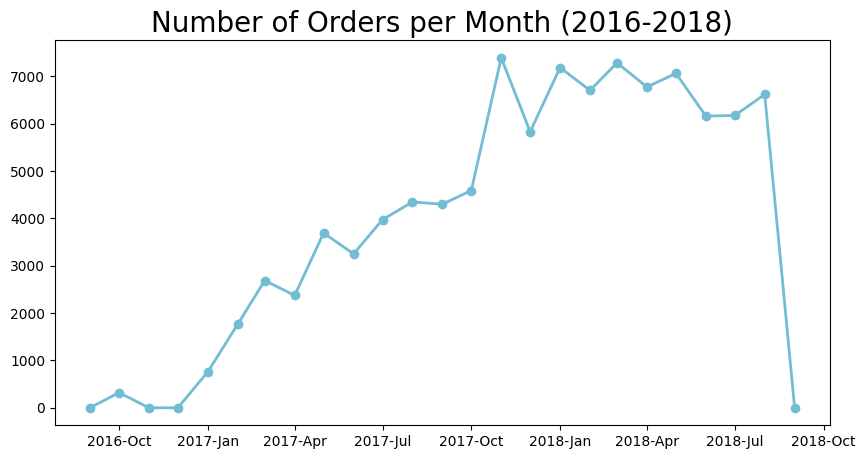

In [52]:
# Mengganti nama kolom untuk konsistensi
all_df.rename(columns={'order_approved_at': 'order_date'}, inplace=True)

# Memfilter data berdasarkan tahun
all_df['order_date'] = pd.to_datetime(all_df['order_date'])
filtered_df = all_df[(all_df['order_date'].dt.year >= 2016) & (all_df['order_date'].dt.year <= 2018)]

# Melakukan resampling bulanan
monthly_orders_df = filtered_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "price": "sum"
})

# Mengubah format index dan mereset index
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%b')
monthly_orders_df = monthly_orders_df.reset_index()
# Mengganti nama kolom
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue",
    "order_date": "month"
}, inplace=True)

# Mengubah kolom 'month' menjadi datetime
monthly_orders_df['month'] = pd.to_datetime(monthly_orders_df['month'], format='%Y-%b')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["month"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


<ipython-input-53-172d4888affd>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = filtered_df.resample(rule='M', on='order_date').agg({


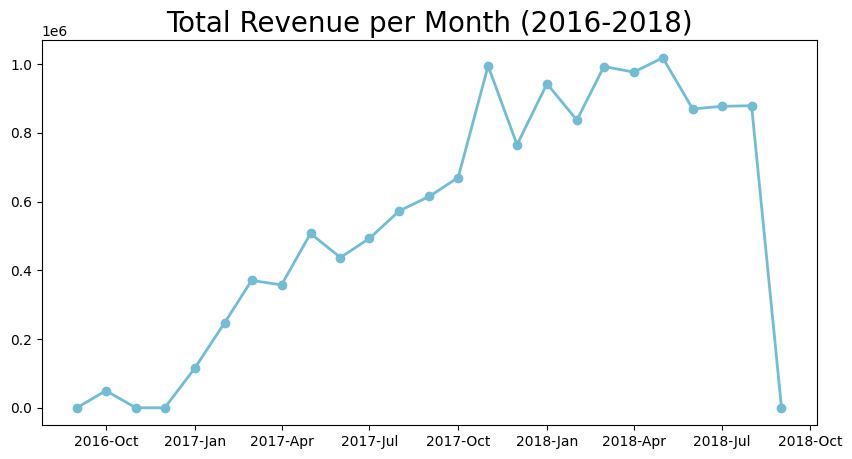

In [53]:
# Mengganti nama kolom untuk konsistensi
all_df.rename(columns={'order_approved_at': 'order_date'}, inplace=True)

# Memfilter data berdasarkan tahun
all_df['order_date'] = pd.to_datetime(all_df['order_date'])
filtered_df = all_df[(all_df['order_date'].dt.year >= 2016) & (all_df['order_date'].dt.year <= 2018)]

# Melakukan resampling bulanan
monthly_orders_df = filtered_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "price": "sum"
})

# Mengubah format index dan mereset index
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%b')
monthly_orders_df = monthly_orders_df.reset_index()
# Mengganti nama kolom
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue",
    "order_date": "month"
}, inplace=True)

# Mengubah kolom 'month' menjadi datetime
monthly_orders_df['month'] = pd.to_datetime(monthly_orders_df['month'], format='%Y-%b')

# Plotting total revenue per month
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["month"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


### Pertanyaan 2:

<ipython-input-54-dbc92464c7c7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_count", y="product_category_name", data=top_5_categories, palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949

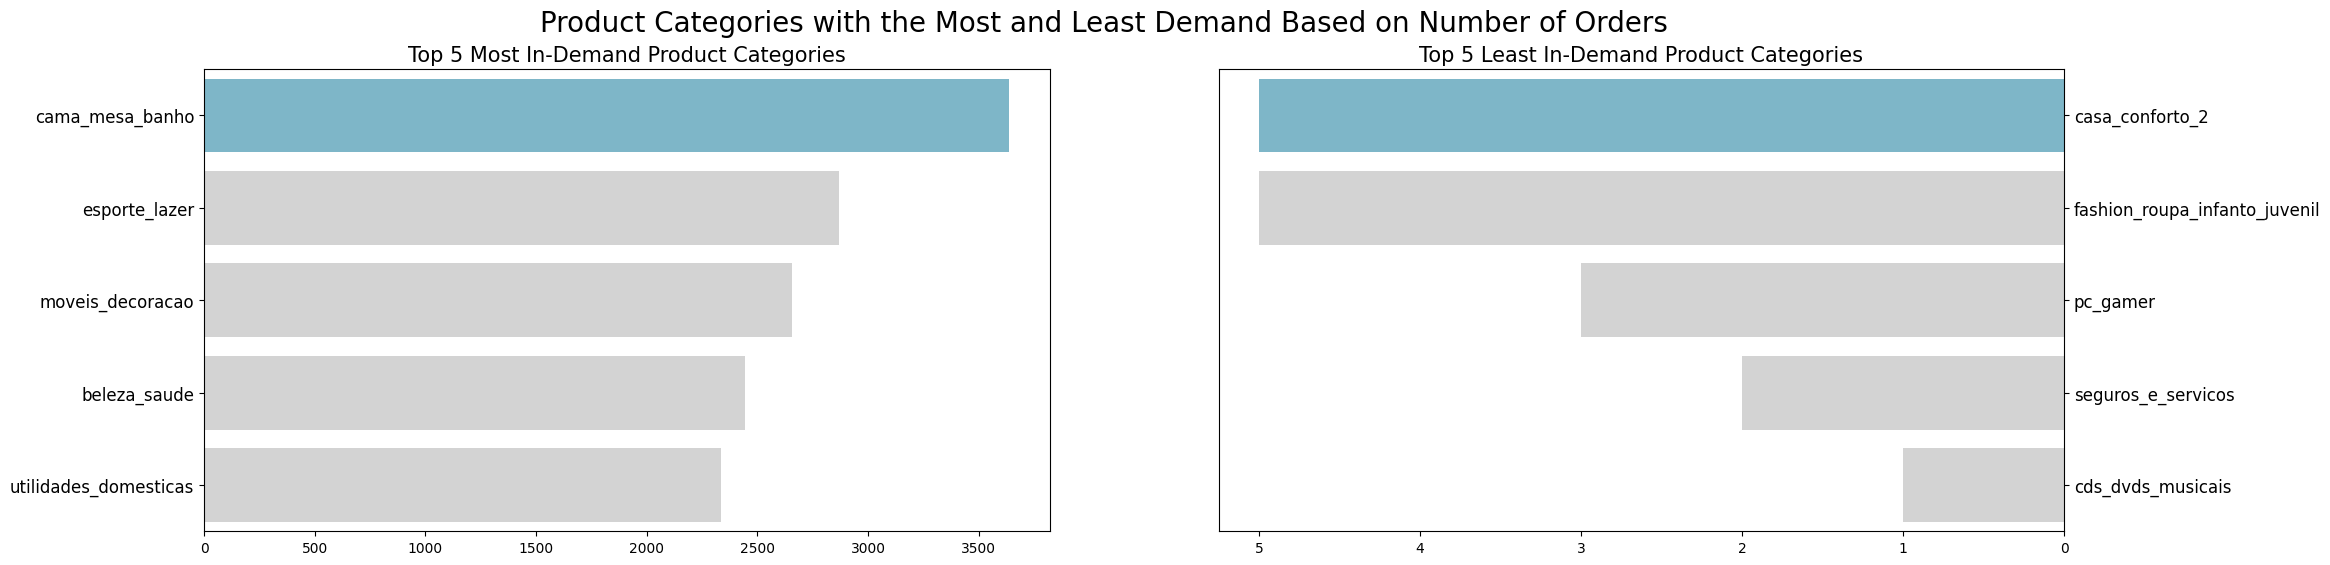

In [54]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung jumlah produk unik
category_counts = all_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).reset_index()
category_counts.rename(columns={"product_id": "product_count"}, inplace=True)

# Mengambil 5 kategori dengan jumlah produk terbanyak dan tersedikit
top_5_categories = category_counts.head(5)
bottom_5_categories = category_counts.tail(5)

# Membuat bar chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4"] + ["#D3D3D3"] * 4

# Bar chart untuk kategori dengan jumlah produk terbanyak
sns.barplot(x="product_count", y="product_category_name", data=top_5_categories, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Most In-Demand Product Categories", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Bar chart untuk kategori dengan jumlah produk tersedikit
sns.barplot(x="product_count", y="product_category_name", data=bottom_5_categories, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Top 5 Least In-Demand Product Categories", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Product Categories with the Most and Least Demand Based on Number of Orders", fontsize=20)
plt.show()

**Insight:**
- Grafik menunjukkan bahwa jumlah penjualan cenderung mengalami kenaikan dari bulan Oktober 2016 hingga bulan Desember 2017
- Grafik menunjukkan 5 kategori produk yang paling diminati dan 5 kategori produk yang paling sepi peminat

## Analisis Lanjutan (Opsional)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

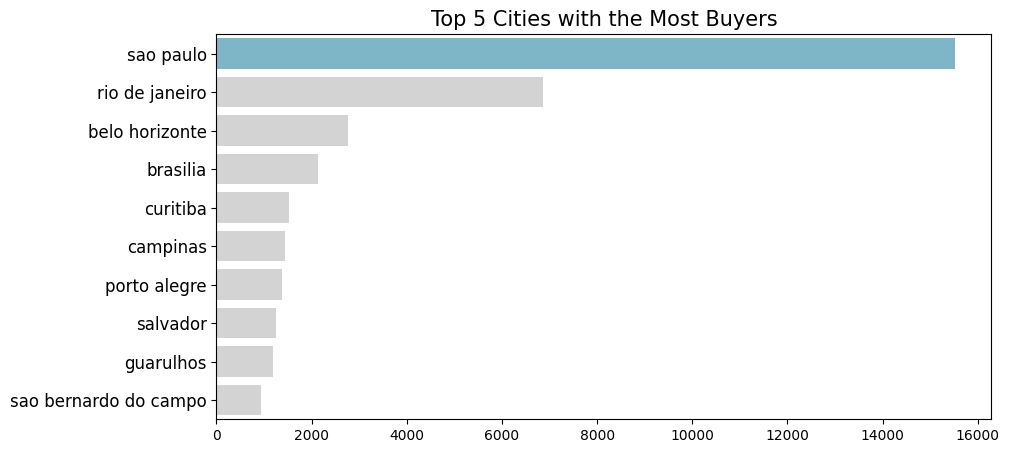

In [55]:

# Mengelompokkan data berdasarkan kota dan menghitung jumlah pelanggan
customer_city_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
customer_city_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

# Mengambil 10 kota dengan jumlah pelanggan terbanyak
top_10_customer_cities = customer_city_df.sort_values(by="customer_count", ascending=False).head(10)

# Membuat bar chart
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * (len(top_10_customer_cities) - 1)
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=top_10_customer_cities,
    palette=colors_,
    hue="customer_city",
    dodge=False
)
plt.title("Top 5 Cities with the Most Buyers", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


<ipython-input-56-bade4893123b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

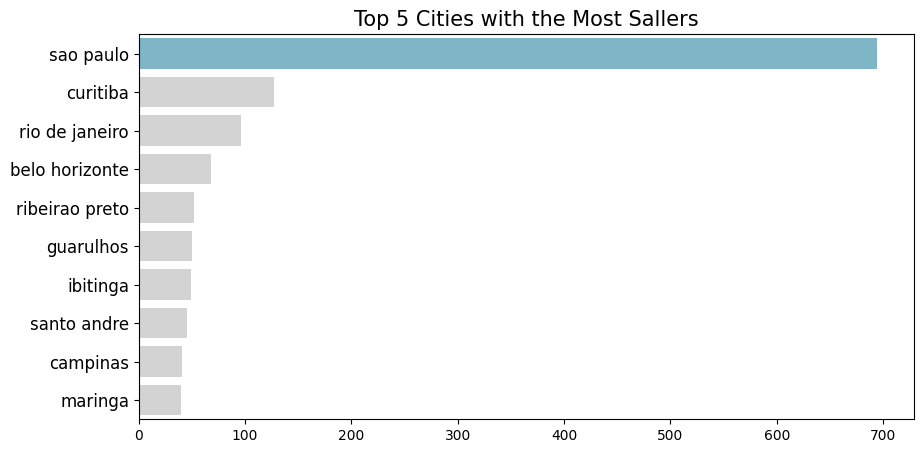

In [56]:
# Mengelompokkan data berdasarkan kota dan menghitung jumlah pelanggan unik
seller_city_df = all_df.groupby(by="seller_city").seller_id.nunique().reset_index()
seller_city_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)

# Mengambil 10 kota dengan jumlah pelanggan terbanyak
top_10_seller_cities = seller_city_df.sort_values(by="seller_count", ascending=False).head(10)

# Membuat bar chart
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * (len(top_10_seller_cities) - 1)
sns.barplot(
    x="seller_count",
    y="seller_city",
    data=top_10_seller_cities,
    palette=colors_
)
plt.title("Top 5 Cities with the Most Sallers", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Penjualan menunjukkan tren peningkatan sejak Oktober 2016, dengan lonjakan signifikan pada Desember 2017. Setelah itu, grafik penjualan cenderung stabil hingga Agustus 2018, yang sejalan dengan pendapatan yang diterima selama periode tersebut.
- Kategori produk dengan peminat terbanyak adalah cama_mesa_banho, diikuti esporte_lazer dan movies_decoracao. Sebaliknya, kategori produk yang paling sepi peminat yaitu cds_dvds_musicais
- Kota dengan jumlah pembeli terbanyak yaitu Sao Paulo, Rio De Janeiro, dan Belo Horizonte
- Kota dengan jumlah penjual terbanyak yaitu Sao Paulo, Curitiba, dan Rio De Janeiro

In [ ]:
all_df.to_csv("all_data.csv", index=False)